In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read in the Network Measures dataset
nm_df = pd.read_csv("NetworkMeasuresFeatures.csv")

In [4]:
# Renaming columns in readable format to understand what each column represents.
col_names = ['Actor', 'A_Acc',
             'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
             'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
             'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
             'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
             'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector',
             'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
             'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
             'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
             'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
             'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
             'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
             'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
             'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
             'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
             'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
             'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
             'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
             'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
             'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
             'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
             'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
             'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
             'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
             'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
             'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type'
            ]
nm_df.columns = col_names

In [5]:
# Change Type as Category
nm_df.Type = nm_df.Type.astype('category')

In [6]:
# Creating a numerical field for Type
nm_df.Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [7]:
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Columns: 105 entries, Actor to Type
dtypes: float64(42), int64(63)
memory usage: 39.8 MB


In [8]:
nm_df.isna().any()

Actor                               False
A_Acc                               False
PartyPlay_InDegree                  False
PartyPlay_OutDegree                 False
PartyPlay_Degree                    False
PartyPlay_WeightedDegree            False
PartyPlay_WeightedInDegree          False
PartyPlay_WeightedOutDegree         False
PartyPlay_Eccentricity              False
PartyPlay_ClosenessCentrality       False
PartyPlay_BetweennessCentrality     False
PartyPlay_Authority                 False
PartyPlay_Hub                       False
PartyPlay_ModularityClass           False
PartyPlay_Pagerank                  False
PartyPlay_ComponentId               False
PartyPlay_StrConnId                 False
PartyPlay_ClusteringCoefficient     False
PartyPlay_Eigenvector               False
Friendship_InDegree                 False
Friendship_OutDegree                False
Friendship_Degree                   False
Friendship_WeightedDegree           False
Friendship_WeightedInDegree       

In [9]:
nm_df.isnull().any()

Actor                               False
A_Acc                               False
PartyPlay_InDegree                  False
PartyPlay_OutDegree                 False
PartyPlay_Degree                    False
PartyPlay_WeightedDegree            False
PartyPlay_WeightedInDegree          False
PartyPlay_WeightedOutDegree         False
PartyPlay_Eccentricity              False
PartyPlay_ClosenessCentrality       False
PartyPlay_BetweennessCentrality     False
PartyPlay_Authority                 False
PartyPlay_Hub                       False
PartyPlay_ModularityClass           False
PartyPlay_Pagerank                  False
PartyPlay_ComponentId               False
PartyPlay_StrConnId                 False
PartyPlay_ClusteringCoefficient     False
PartyPlay_Eigenvector               False
Friendship_InDegree                 False
Friendship_OutDegree                False
Friendship_Degree                   False
Friendship_WeightedDegree           False
Friendship_WeightedInDegree       

In [10]:
# Creating different datasets based on the Group activity
party_df = nm_df[['Actor', 'A_Acc',
                  'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
                  'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
                  'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
                  'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
                  'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient',
                  'PartyPlay_Eigenvector', 'Type']].copy()
friendship_df = nm_df[['Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
                       'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
                       'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
                       'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
                       'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
                       'Type']].copy()
trade_df = nm_df[[
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
    'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
    'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
    'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
    'Type']].copy()
shop_df = nm_df[[
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type']].copy()
whisper_df = nm_df[[
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
    'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
    'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
    'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
    'Type' ]].copy()
mail_df = nm_df[[
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
    'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
    'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
    'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
    'Type']].copy()


In [11]:
# Analysis of party play dataset

In [12]:
party_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 20 columns):
Actor                              49739 non-null int64
A_Acc                              49739 non-null int64
PartyPlay_InDegree                 49739 non-null int64
PartyPlay_OutDegree                49739 non-null int64
PartyPlay_Degree                   49739 non-null int64
PartyPlay_WeightedDegree           49739 non-null int64
PartyPlay_WeightedInDegree         49739 non-null int64
PartyPlay_WeightedOutDegree        49739 non-null int64
PartyPlay_Eccentricity             49739 non-null int64
PartyPlay_ClosenessCentrality      49739 non-null float64
PartyPlay_BetweennessCentrality    49739 non-null float64
PartyPlay_Authority                49739 non-null float64
PartyPlay_Hub                      49739 non-null float64
PartyPlay_ModularityClass          49739 non-null int64
PartyPlay_Pagerank                 49739 non-null float64
PartyPlay_ComponentId              49739 

In [13]:
# Getting the list of cols that we want to visulaize in pairplot. This will exclude the Actor and A_Acc cols
cols = party_df.columns.tolist()
cols.remove('Actor'); cols.remove('A_Acc')
print(cols)

['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree', 'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank', 'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector', 'Type']


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_met

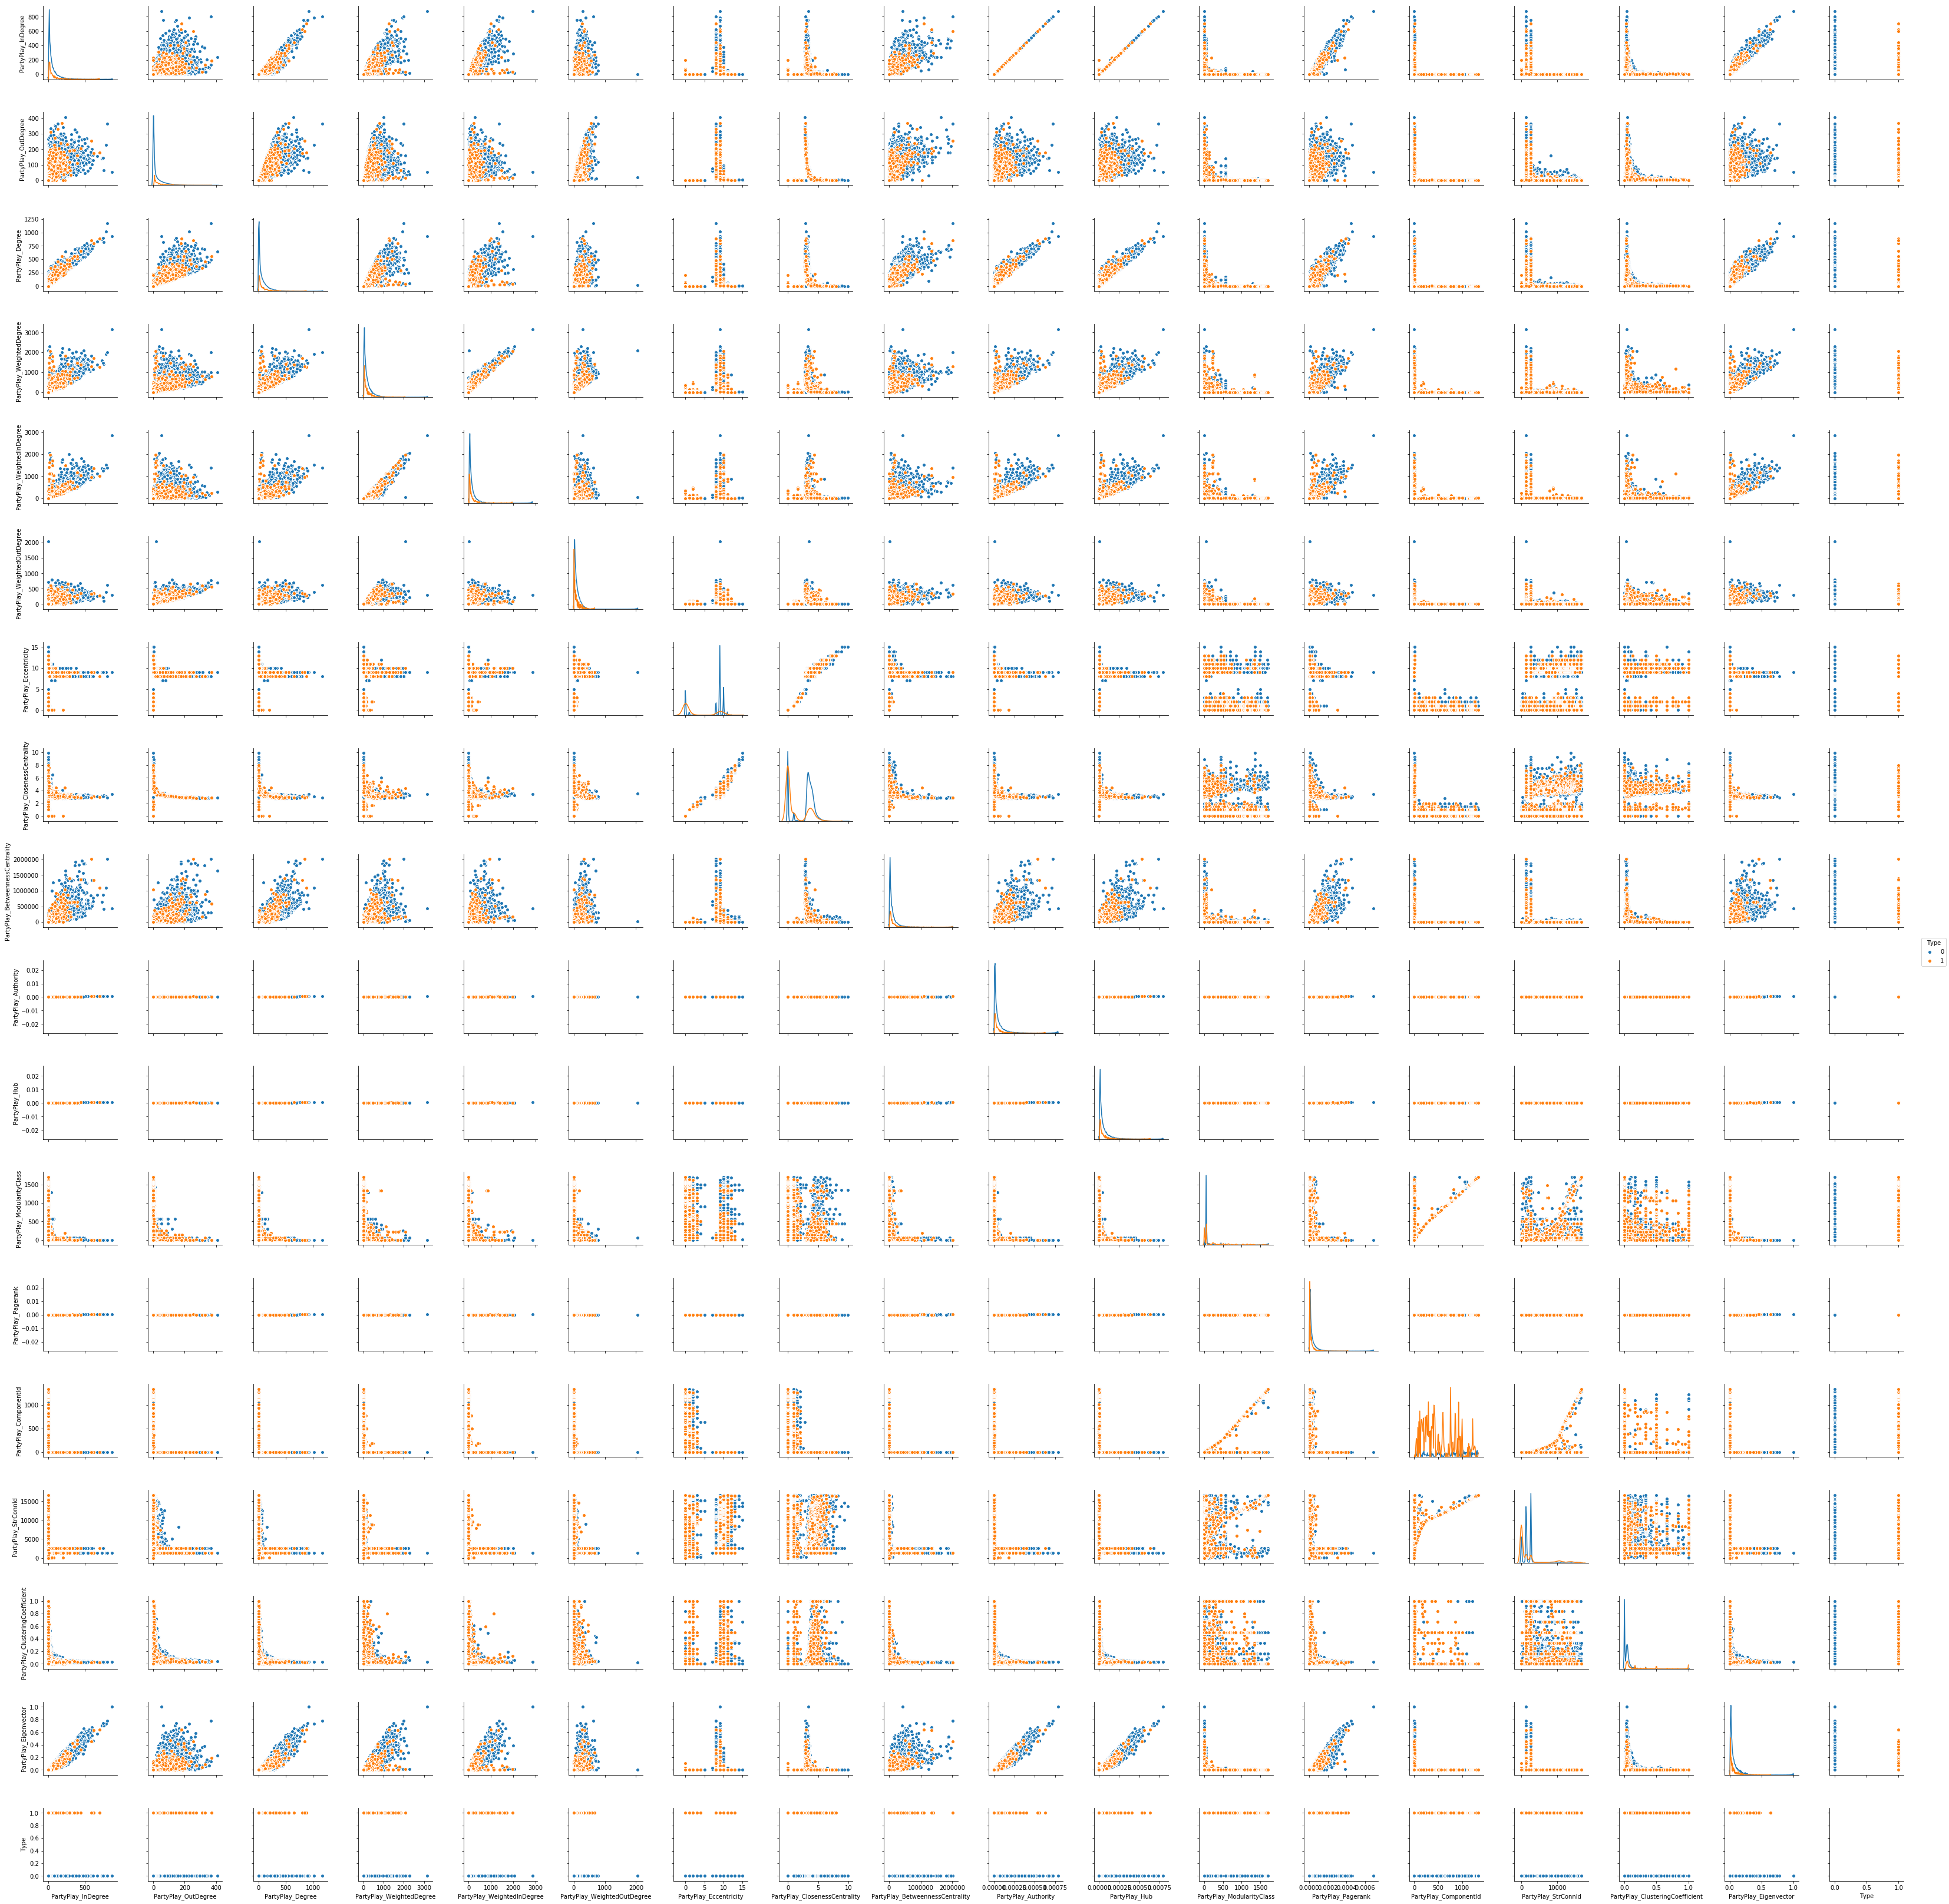

In [14]:
sns.pairplot(party_df[cols], hue='Type', diag_kind='kde')

In [15]:
# 1. Most of the features have distributions with long tail.
# 2. Closeness centrality and Eccentricity seems to have linear relationship between each other.
# 3. The distributions of Closeness centrality and Eccentricity shows two different clusters. In both of the clusters,
# its clear that for higher valued cluster, the density of human players is more compared to bot players.
# 4. There is linear relationship between PartyPlay_WeightedDegree and PartyPlay_WeightedInDegree.
# 5. There is linear relationship between PartyPlay_Degree with PartyPlay_Authority, PartyPlay_Hub.
# 6. For PartyPlay_ComponentId, there is clear distinction in the distribution of values, where the distributions of 
# bot player is higher.
# 7. For PartyPlay_StrConnId, there seems to be three clusters. In the lowest cluster, the bot player values are little
# high. For the higher valued clusters, there are more human players.


In [16]:
party_df[cols].corr()

,PartyPlay_InDegree,PartyPlay_OutDegree,PartyPlay_Degree,PartyPlay_WeightedDegree,PartyPlay_WeightedInDegree,PartyPlay_WeightedOutDegree,PartyPlay_Eccentricity,PartyPlay_ClosenessCentrality,PartyPlay_BetweennessCentrality,PartyPlay_Authority,PartyPlay_Hub,PartyPlay_ModularityClass,PartyPlay_Pagerank,PartyPlay_ComponentId,PartyPlay_StrConnId,PartyPlay_ClusteringCoefficient,PartyPlay_Eigenvector,Type
PartyPlay_InDegree,1.000000,0.661925,0.938424,0.877872,0.889119,0.644689,0.216991,0.126276,0.777862,0.999961,0.999506,-0.094888,0.959927,-0.066406,-0.112548,-0.048126,0.956524,-0.122705
PartyPlay_OutDegree,0.661925,1.000000,0.880132,0.747967,0.539441,0.876678,0.299405,0.172964,0.673571,0.663661,0.664548,-0.128476,0.654565,-0.090941,-0.132242,-0.035004,0.646297,-0.164820
PartyPlay_Degree,0.938424,0.880132,1.000000,0.900734,0.811745,0.812375,0.275427,0.159696,0.803104,0.939200,0.939320,-0.119312,0.909652,-0.083973,-0.132232,-0.046614,0.903686,-0.153681
PartyPlay_WeightedDegree,0.877872,0.747967,0.900734,1.000000,0.936164,0.849427,0.257088,0.153371,0.699428,0.878545,0.879209,-0.097820,0.869085,-0.075561,-0.121377,-0.014199,0.874681,-0.127087
PartyPlay_WeightedInDegree,0.889119,0.539441,0.811745,0.936164,1.000000,0.609680,0.192676,0.114581,0.650727,0.889030,0.889078,-0.073981,0.869926,-0.056832,-0.096857,-0.027832,0.875338,-0.096264
PartyPlay_WeightedOutDegree,0.644689,0.876678,0.812375,0.849427,0.609680,1.000000,0.290428,0.173807,0.600195,0.646338,0.647765,-0.109502,0.653685,-0.085055,-0.128276,0.009763,0.658179,-0.142040
PartyPlay_Eccentricity,0.216991,0.299405,0.275427,0.257088,0.192676,0.290428,1.000000,0.975258,0.191588,0.221493,0.225037,-0.161802,0.264578,-0.231245,0.185601,0.248391,0.185516,-0.391885
PartyPlay_ClosenessCentrality,0.126276,0.172964,0.159696,0.153371,0.114581,0.173807,0.975258,1.000000,0.119328,0.130426,0.134302,-0.092752,0.181499,-0.192494,0.277117,0.258409,0.098347,-0.371373
PartyPlay_BetweennessCentrality,0.777862,0.673571,0.803104,0.699428,0.650727,0.600195,0.191588,0.119328,1.000000,0.778189,0.775113,-0.066053,0.817691,-0.062180,-0.102960,-0.056969,0.667716,-0.103018
PartyPlay_Authority,0.999961,0.663661,0.939200,0.878545,0.889030,0.646338,0.221493,0.130426,0.778189,1.000000,0.999470,-0.094511,0.960704,-0.066480,-0.113801,-0.046443,0.956150,-0.124993


In [17]:
# From the above correlation matrix, it seems that there are lot of weak predictors from the list of features. Most
# of the features are correlated to the target column with correlated value in the range of 0.1 to 0.2. There is no
# one strong predictor that stands out.

In [18]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [19]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
# Get all the models in a list
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Tree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC()))

In [21]:
X_cols = ['PartyPlay_Degree', 'PartyPlay_Eccentricity', 
          'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality', 'PartyPlay_Authority', 
          'PartyPlay_Hub', 'PartyPlay_Pagerank', 'PartyPlay_ComponentId', 'PartyPlay_StrConnId',
          'PartyPlay_Eigenvector']
y_col = ['Type']
X = party_df[X_cols]
y = party_df[y_col]

In [22]:
results = []
model_names = []
for model_name, model in models:
    kfold_cv = model_selection.KFold(n_splits=10, random_state=23)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold_cv, scoring='accuracy')
    #print(model_name, cv_results)
    results.append(cv_results)
    model_names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:43

LR: 0.841191 (0.084743)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA: 0.840367 (0.085174)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

KNN: 0.829591 (0.077903)
Tree: 0.794527 (0.073654)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

NB: 0.782060 (0.060924)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

SVC: 0.845434 (0.085392)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [24]:
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report

In [25]:
print(results)

[array([0.92802573, 0.93767591, 0.93606755, 0.88299156, 0.84941697,
       0.84197829, 0.66485726, 0.79815038, 0.73542421, 0.83732154]), array([0.92802573, 0.93787696, 0.93606755, 0.88258947, 0.84881383,
       0.84117411, 0.6650583 , 0.79493366, 0.73301166, 0.83611502]), array([0.89766787, 0.89626055, 0.92501005, 0.85283474, 0.82529152,
       0.84137515, 0.66385203, 0.79453156, 0.72436671, 0.87472351]), array([0.84941697, 0.88801769, 0.88459992, 0.8371532 , 0.78488138,
       0.80579011, 0.64354644, 0.75050261, 0.70727784, 0.79408808]), array([0.83313229, 0.81001206, 0.82428629, 0.83353438, 0.83353438,
       0.80659429, 0.69240048, 0.77804584, 0.75914757, 0.64990951]), array([0.92782469, 0.9384801 , 0.93586651, 0.88439887, 0.84981906,
       0.84278247, 0.66525935, 0.79855247, 0.73522316, 0.87613111])]


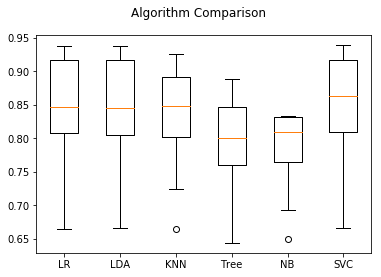

In [26]:
# Plotting the results of cross validation in box plot to check the variation of cross validation scores of each algo.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

In [27]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
[[12672     0]
 [ 2250     0]]
Overall precision of LR: 0.0
Overall recall of LR: 0.0
Overall F1 Score of LR: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.00      0.00      0.00      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.42      0.50      0.46     14922
weighted avg       0.72      0.85      0.78     14922

Running model LDA
Confusion Matrix: 
[[12484   188]
 [ 2154    96]]
Overall precision of LDA: 0.3380281690140845
Overall recall of LDA: 0.042666666666666665
Overall F1 Score of LDA: 0.07576953433307024
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12672
           1       0.34      0.04      0.08      2250

   micro avg       0.84      0.84      0.84     14922
   macro avg       0.60      0.51      0.50     14922
weighted avg      

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipyker

Confusion Matrix: 
[[12545   127]
 [ 2034   216]]
Overall precision of KNN: 0.6297376093294461
Overall recall of KNN: 0.096
Overall F1 Score of KNN: 0.16660239105283456
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.63      0.10      0.17      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.75      0.54      0.54     14922
weighted avg       0.83      0.86      0.81     14922

Running model Tree
Confusion Matrix: 
[[11827   845]
 [ 1947   303]]
Overall precision of Tree: 0.26393728222996515
Overall recall of Tree: 0.13466666666666666
Overall F1 Score of Tree: 0.17834020011771629
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12672
           1       0.26      0.13      0.18      2250

   micro avg       0.81      0.81      0.81     14922
   macro avg       0.56      0.5

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: 
[[12660    12]
 [ 2120   130]]
Overall precision of SVC: 0.9154929577464789
Overall recall of SVC: 0.057777777777777775
Overall F1 Score of SVC: 0.10869565217391304
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     12672
           1       0.92      0.06      0.11      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.89      0.53      0.52     14922
weighted avg       0.87      0.86      0.80     14922



In [28]:
base_model = GaussianNB()
#base_model = LinearDiscriminantAnalysis()
classfiers = [
    ('Bagging Classifier', BaggingClassifier(base_estimator=base_model, n_estimators=50, max_samples=0.7)),
    ('AdaBoost Classifier', AdaBoostClassifier(base_estimator=base_model, n_estimators= 50)),
    ('Gradient Boost Classfier', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators = 50))
]
for classifier_name, classifier in classfiers:
    print("Running %s" % classifier_name)
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    print(classifier.score(X_test, y_test))
    print(metrics.confusion_matrix(y_test, y_predict))
    print(metrics.classification_report(y_test, y_predict))
    print("-------------------------------------------------")

Running Bagging Classifier


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7828709288299156
[[10129  2543]
 [  697  1553]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     12672
           1       0.38      0.69      0.49      2250

   micro avg       0.78      0.78      0.78     14922
   macro avg       0.66      0.74      0.68     14922
weighted avg       0.85      0.78      0.81     14922

-------------------------------------------------
Running AdaBoost Classifier


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8461332261091007
[[12624    48]
 [ 2248     2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.04      0.00      0.00      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.44      0.50      0.46     14922
weighted avg       0.73      0.85      0.78     14922

-------------------------------------------------
Running Gradient Boost Classfier


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8543090738506902
[[12607    65]
 [ 2109   141]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.68      0.06      0.11      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.77      0.53      0.52     14922
weighted avg       0.83      0.85      0.80     14922

-------------------------------------------------
Running Random Forest Classifier


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.8568556493767592
[[12552   120]
 [ 2016   234]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.66      0.10      0.18      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.76      0.55      0.55     14922
weighted avg       0.83      0.86      0.81     14922

-------------------------------------------------


In [29]:
# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  
X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
model = GaussianNB()
model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
print(metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, [0, 1]))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3505562257070098
[[3148 9524]
 [ 167 2083]]
              precision    recall  f1-score   support

           0       0.95      0.25      0.39     12672
           1       0.18      0.93      0.30      2250

   micro avg       0.35      0.35      0.35     14922
   macro avg       0.56      0.59      0.35     14922
weighted avg       0.83      0.35      0.38     14922



In [30]:
# PCA analysis

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
print(cov_matrix)

[[ 1.00002011  0.27543298  0.15969922  0.80311994  0.93921855  0.9393392
   0.90967018 -0.08397432 -0.13223509  0.90370427]
 [ 0.27543298  1.00002011  0.97527768  0.19159172  0.22149724  0.22504109
   0.26458325 -0.23124944  0.18560498  0.18551975]
 [ 0.15969922  0.97527768  1.00002011  0.11933059  0.13042869  0.13430466
   0.1815028  -0.1924978   0.2771226   0.09834853]
 [ 0.80311994  0.19159172  0.11933059  1.00002011  0.77820452  0.77512864
   0.81770759 -0.0621813  -0.10296225  0.66772914]
 [ 0.93921855  0.22149724  0.13042869  0.77820452  1.00002011  0.99948971
   0.9607231  -0.0664818  -0.11380304  0.95616957]
 [ 0.9393392   0.22504109  0.13430466  0.77512864  0.99948971  1.00002011
   0.95795024 -0.06723613 -0.10964296  0.95857648]
 [ 0.90967018  0.26458325  0.1815028   0.81770759  0.9607231   0.95795024
   1.00002011 -0.04637093 -0.09384419  0.90100456]
 [-0.08397432 -0.23124944 -0.1924978  -0.0621813  -0.0664818  -0.06723613
  -0.04637093  1.00002011  0.45310719 -0.05733586]
 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [34]:
print(eigenvectors)
print(eigenvalues)

[[ 4.07716991e-01  4.46001111e-02  1.06167158e-02  2.64410045e-02
   1.08824114e-02  7.88419867e-01 -3.82150353e-01  9.10777191e-02
  -2.34322959e-01  4.86631014e-04]
 [ 1.42104280e-01 -6.47606695e-01 -9.03634608e-02  2.22243081e-01
   8.37642435e-02  1.32098823e-01 -5.84361270e-02  1.38535589e-03
   6.89180831e-01  9.67342881e-04]
 [ 1.01800862e-01 -6.75550338e-01 -4.02294725e-02  1.60662597e-01
   4.79790673e-02 -1.47408283e-01  1.48319427e-01 -1.80982210e-02
  -6.77830790e-01 -5.04723763e-03]
 [ 3.54658321e-01  5.94298170e-02  2.28332949e-02  1.99614018e-01
  -8.46563689e-01 -7.73530957e-03  3.31957365e-01  2.20795145e-02
   5.38222629e-02 -2.91714628e-03]
 [ 4.15979570e-01  7.58911269e-02  3.86130408e-02 -7.57338034e-02
   1.50612181e-01 -1.57070504e-01 -1.13733901e-02 -5.12331620e-01
   2.78880712e-02 -7.09386354e-01]
 [ 4.15890548e-01  7.27752544e-02  3.97569247e-02 -8.28279608e-02
   1.58957753e-01 -1.38182480e-01  2.88066441e-02 -5.21375757e-01
   2.42226388e-02  7.04050088e-01

In [35]:
tot = sum(eigenvalues)
print(tot)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

10.000201053520456


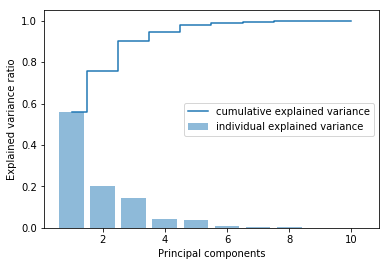

In [37]:
plt.bar(range(1,11), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [38]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.574068784942455, array([ 0.40771699,  0.14210428,  0.10180086,  0.35465832,  0.41597957,
        0.41589055,  0.41094129, -0.0499907 , -0.04960488,  0.39697718])), (2.014521413923106, array([ 0.04460011, -0.64760669, -0.67555034,  0.05942982,  0.07589113,
        0.07277525,  0.03913459,  0.12318573, -0.28803057,  0.08940184])), (1.4286152048841638, array([ 0.01061672, -0.09036346, -0.04022947,  0.02283329,  0.03861304,
        0.03975692,  0.05170889,  0.7367504 ,  0.66212568,  0.05123479])), (0.41438870548837503, array([ 0.026441  ,  0.22224308,  0.1606626 ,  0.19961402, -0.0757338 ,
       -0.08282796,  0.02701571,  0.63751895, -0.65463475, -0.1895987 ])), (0.3749522386270037, array([ 0.01088241,  0.08376424,  0.04797907, -0.84656369,  0.15061218,
        0.15895775, -0.01768844,  0.17531125, -0.19913777,  0.39400341])), (0.09708712673024773, array([ 0.78841987,  0.13209882, -0.14740828, -0.00773531, -0.1570705 ,
       -0.13818248, -0.53838477,  0.00838055,  0.04217875,  0.0606

In [39]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = model_selection.train_test_split(Proj_data_df, y, test_size=0.3, random_state=7)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


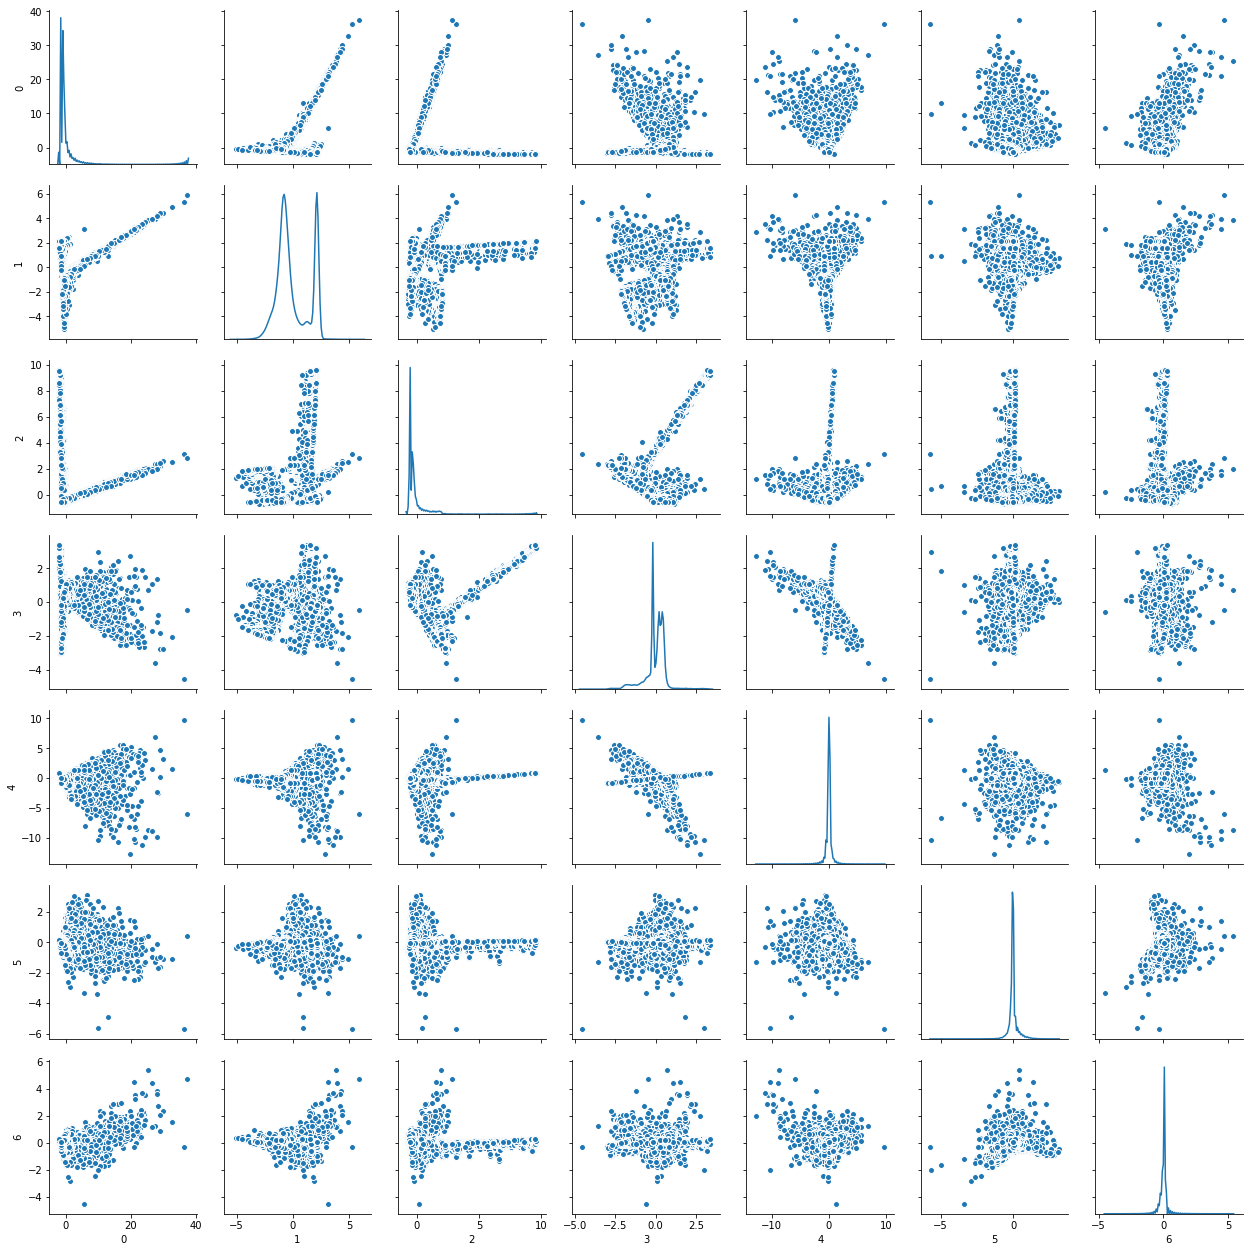

In [41]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

In [42]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train_pca, y_train_pca)
    y_predict_pca = model.predict(X_test_pca)
    score = model.score(X_test_pca, y_test_pca)
    print("Model score %s" % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test_pca, y_predict_pca))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test_pca, y_predict_pca)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test_pca, y_predict_pca)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test_pca, y_predict_pca)))
    print("Classification Report: ")
    print(classification_report(y_test_pca, y_predict_pca, [0, 1]))

Running model LR
Model score 0.8482106956172095
Confusion Matrix: 
[[12653    19]
 [ 2246     4]]
Overall precision of LR: 0.17391304347826086
Overall recall of LR: 0.0017777777777777779
Overall F1 Score of LR: 0.0035195776506819184
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.17      0.00      0.00      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.51      0.50      0.46     14922
weighted avg       0.75      0.85      0.78     14922

Running model LDA


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 0.8445248626189519
Confusion Matrix: 
[[12493   179]
 [ 2141   109]]
Overall precision of LDA: 0.3784722222222222
Overall recall of LDA: 0.04844444444444444
Overall F1 Score of LDA: 0.08589440504334121
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12672
           1       0.38      0.05      0.09      2250

   micro avg       0.84      0.84      0.84     14922
   macro avg       0.62      0.52      0.50     14922
weighted avg       0.78      0.84      0.79     14922

Running model KNN


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Model score 0.8535719072510387
Confusion Matrix: 
[[12530   142]
 [ 2043   207]]
Overall precision of KNN: 0.5931232091690545
Overall recall of KNN: 0.092
Overall F1 Score of KNN: 0.1592920353982301
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.59      0.09      0.16      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.73      0.54      0.54     14922
weighted avg       0.82      0.85      0.81     14922

Running model Tree
Model score 0.8082696689451816
Confusion Matrix: 
[[11769   903]
 [ 1958   292]]
Overall precision of Tree: 0.24435146443514644
Overall recall of Tree: 0.12977777777777777
Overall F1 Score of Tree: 0.1695210449927431
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12672
           1       0.24      0.13      0.17      2250

   micro avg       0.81   

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model score 0.8529687709422329
Confusion Matrix: 
[[12589    83]
 [ 2111   139]]
Overall precision of SVC: 0.6261261261261262
Overall recall of SVC: 0.06177777777777778
Overall F1 Score of SVC: 0.11245954692556633
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.63      0.06      0.11      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.74      0.53      0.52     14922
weighted avg       0.82      0.85      0.80     14922



In [43]:
# K means clustering

In [44]:
from sklearn.cluster import KMeans

In [45]:
cluster_range = range( 2, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=7, n_init=10)
    clusters.fit(X)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,1.919338e+14,2
1,9.846142e+13,3
2,5.927069e+13,4
3,3.912442e+13,5
4,2.756453e+13,6
5,2.006467e+13,7
6,1.581372e+13,8
7,1.270188e+13,9


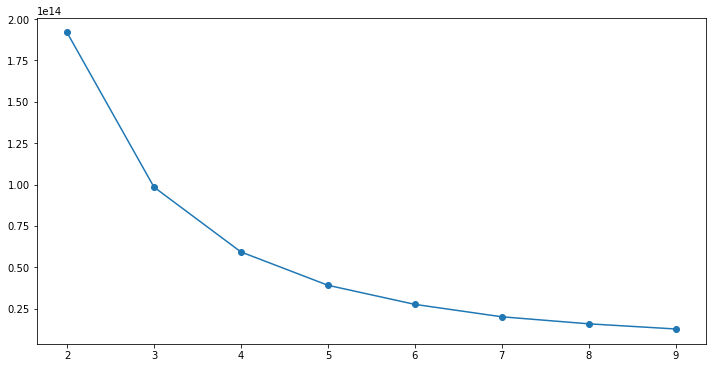

In [46]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [47]:
k_means_cluster_num = 3

In [48]:
party_df_clusters = KMeans(n_clusters=k_means_cluster_num, n_init=10, random_state=7)

In [49]:
party_df_clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [50]:
prediction=party_df_clusters.predict(X)
party_df_new = party_df.copy()
party_df_new["GROUP"] = prediction

In [52]:
tmp_cols = X_cols; tmp_cols.append('GROUP'); tmp_cols.append('Type')
party_df_new[tmp_cols].boxplot(by = ['GROUP', 'Type'], layout=(2,5), figsize=(15, 10))

ValueError: Grouper for 'GROUP' not 1-dimensional

In [ ]:
# Evaluating model after transformation

In [60]:
party_df_1 = party_df.copy()

In [54]:
print(party_df_1.PartyPlay_InDegree.head(5))
party_df_1.PartyPlay_InDegree = party_df_1.PartyPlay_InDegree.apply(np.log).apply(np.log)
tmp = party_df_1.PartyPlay_InDegree.copy()
negative_inf_indices = tmp[tmp == -np.inf].index
tmp.drop(negative_inf_indices, inplace=True)
party_df_1.PartyPlay_InDegree.replace(to_replace=-np.inf, value=tmp.min(), inplace=True)
print(party_df_1.PartyPlay_InDegree.head(5))
#party_df_1.PartyPlay_InDegree.replace(to_replace=np.NaN, value=0.0, inplace=True)

0    52
1     9
2     4
3     0
4     1
Name: PartyPlay_InDegree, dtype: int64
0    1.374030
1    0.787195
2    0.326634
3         NaN
4   -0.366513
Name: PartyPlay_InDegree, dtype: float64


In [55]:
party_df_1.PartyPlay_InDegree.head(5)

0    1.374030
1    0.787195
2    0.326634
3         NaN
4   -0.366513
Name: PartyPlay_InDegree, dtype: float64

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

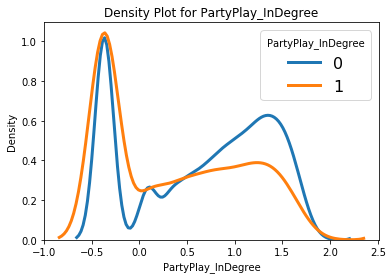

In [57]:
for player_type in [0, 1]:
    subset = party_df_1[party_df_1.Type == player_type]
    sns.distplot(subset['PartyPlay_InDegree'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'PartyPlay_InDegree')
plt.title('Density Plot for PartyPlay_InDegree')
plt.xlabel('PartyPlay_InDegree')
plt.ylabel('Density')

In [58]:
cols_to_transform = ['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
                     'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
                     'PartyPlay_BetweennessCentrality',
                     'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
                     'PartyPlay_ClusteringCoefficient','PartyPlay_Eigenvector']
#cols_to_transform = ['PartyPlay_InDegree']

In [59]:
party_df_1 = party_df.copy()
for col in cols_to_transform:
    print(party_df_1[col].head(2))
    # Performing double log transformation of data
    party_df_1[col] = party_df_1[col].apply(np.log).apply(np.log)
    tmp = party_df_1[col].copy()
    negative_inf_indices = tmp[tmp == -np.inf].index
    tmp.drop(negative_inf_indices, inplace=True)
    party_df_1[col].replace(to_replace=-np.inf, value=tmp.min(), inplace=True)
    party_df_1[col].replace(to_replace=np.NaN, value=0.0, inplace=True)
    print(party_df_1[col].head(2))

0    52
1     9
Name: PartyPlay_InDegree, dtype: int64
0    1.374030
1    0.787195
Name: PartyPlay_InDegree, dtype: float64
0    59
1     8
Name: PartyPlay_OutDegree, dtype: int64
0    1.405493
1    0.732099
Name: PartyPlay_OutDegree, dtype: float64
0    111
1     17
Name: PartyPlay_Degree, dtype: int64
0    1.549588
1    1.041412
Name: PartyPlay_Degree, dtype: float64
0    204
1     19
Name: PartyPlay_WeightedDegree, dtype: int64
0    1.671120
1    1.079918
Name: PartyPlay_WeightedDegree, dtype: float64
0    75
1     9
Name: PartyPlay_WeightedInDegree, dtype: int64
0    1.462674
1    0.787195
Name: PartyPlay_WeightedInDegree, dtype: float64
0    129
1     10
Name: PartyPlay_WeightedOutDegree, dtype: int64
0    1.581000
1    0.834032
Name: PartyPlay_WeightedOutDegree, dtype: float64
0    20738.257962
1     1121.561983
Name: PartyPlay_BetweennessCentrality, dtype: float64
0    2.296540
1    1.949116
Name: PartyPlay_BetweennessCentrality, dtype: float64
0    0.000047
1    0.000009
Name: 

In [ ]:
for player_type in ['Human', 'Bot']:
    subset = party_df_1[party_df_1.Type == player_type]
    sns.distplot(subset['PartyPlay_InDegree'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'PartyPlay_InDegree')
plt.title('Density Plot for PartyPlay_InDegree')
plt.xlabel('PartyPlay_InDegree')
plt.ylabel('Density')

In [ ]:
sns.pairplot(party_df_1[cols], hue='Type', diag_kind='kde')

In [64]:
X_cols = ['PartyPlay_Degree', 'PartyPlay_Eccentricity', 
          'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality', 'PartyPlay_Authority', 
          'PartyPlay_Hub', 'PartyPlay_Pagerank', 'PartyPlay_ComponentId', 'PartyPlay_StrConnId',
          'PartyPlay_Eigenvector']
y_col = ['Type']
X = party_df_1[X_cols]
y = party_df_1[y_col]

In [62]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
[[12672     0]
 [ 2250     0]]
Overall precision of LR: 0.0
Overall recall of LR: 0.0
Overall F1 Score of LR: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.00      0.00      0.00      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.42      0.50      0.46     14922
weighted avg       0.72      0.85      0.78     14922

Running model LDA
Confusion Matrix: 
[[12484   188]
 [ 2154    96]]
Overall precision of LDA: 0.3380281690140845
Overall recall of LDA: 0.042666666666666665
Overall F1 Score of LDA: 0.07576953433307024
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12672
           1       0.34      0.04      0.08      2250

   micro avg       0.84      0.84      0.84     14922
   macro avg       0.60      0.51      0.50     14922
weighted avg      

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipyker

Confusion Matrix: 
[[12545   127]
 [ 2034   216]]
Overall precision of KNN: 0.6297376093294461
Overall recall of KNN: 0.096
Overall F1 Score of KNN: 0.16660239105283456
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.63      0.10      0.17      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.75      0.54      0.54     14922
weighted avg       0.83      0.86      0.81     14922

Running model Tree
Confusion Matrix: 
[[11803   869]
 [ 1955   295]]
Overall precision of Tree: 0.2534364261168385
Overall recall of Tree: 0.13111111111111112
Overall F1 Score of Tree: 0.17281780902167548
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12672
           1       0.25      0.13      0.17      2250

   micro avg       0.81      0.81      0.81     14922
   macro avg       0.56      0.53

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: 
[[12660    12]
 [ 2120   130]]
Overall precision of SVC: 0.9154929577464789
Overall recall of SVC: 0.057777777777777775
Overall F1 Score of SVC: 0.10869565217391304
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     12672
           1       0.92      0.06      0.11      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.89      0.53      0.52     14922
weighted avg       0.87      0.86      0.80     14922



In [65]:
X_cols = ['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
    'PartyPlay_ClusteringCoefficient',
    'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
    'Friendship_ClusteringCoefficient',
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_ClusteringCoefficient',
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_ClusteringCoefficient',
    'Shop_InDegree', 'Shop_OutDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
    'Shop_ClusteringCoefficient', 
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_ClusteringCoefficient',
    'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_BetweennessCentrality', 'PartyPlay_ClosenessCentrality', 
    'PartyPlay_Eigenvector', 'PartyPlay_Eccentricity', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank',
    'Friendship_Degree', 'Friendship_WeightedDegree', 'Friendship_BetweennessCentrality', 'Friendship_ClosenessCentrality', 
    'Friendship_Eigenvector', 'Friendship_Eccentricity', 'Friendship_Authority', 'Friendship_Hub', 'Friendship_Pagerank',
    'Trade_Degree', 'Trade_WeightedDegree', 'Trade_BetweennessCentrality',  'Trade_ClosenessCentrality',
    'Trade_Eigenvector', 'Trade_Eccentricity', 'Trade_Authority', 'Trade_Hub', 'Trade_Pagerank',
    'Shop_Degree', 'Shop_WeightedDegree', 'Shop_BetweennessCentrality', 'Shop_ClosenessCentrality',
    'Shop_Eigenvector', 'Shop_Eccentricity', 'Shop_Authority', 'Shop_Hub', 'Shop_Pagerank',
    'Mail_Degree', 'Mail_WeightedDegree', 'Mail_BetweennessCentrality', 'Mail_ClosenessCentrality', 
    'Mail_Eigenvector', 'Mail_Eccentricity', 'Mail_Authority', 'Mail_Hub', 'Mail_Pagerank']
y_col = ['Type']
X = nm_df[X_cols]
y = nm_df[y_col]

In [66]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
[[12672     0]
 [ 2250     0]]
Overall precision of LR: 0.0
Overall recall of LR: 0.0
Overall F1 Score of LR: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.00      0.00      0.00      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.42      0.50      0.46     14922
weighted avg       0.72      0.85      0.78     14922

Running model LDA
Confusion Matrix: 
[[12484   188]
 [ 2154    96]]
Overall precision of LDA: 0.3380281690140845
Overall recall of LDA: 0.042666666666666665
Overall F1 Score of LDA: 0.07576953433307024
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12672
           1       0.34      0.04      0.08      2250

   micro avg       0.84      0.84      0.84     14922
   macro avg       0.60      0.51      0.50     14922
weighted avg      

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/ipyker

Confusion Matrix: 
[[12545   127]
 [ 2034   216]]
Overall precision of KNN: 0.6297376093294461
Overall recall of KNN: 0.096
Overall F1 Score of KNN: 0.16660239105283456
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12672
           1       0.63      0.10      0.17      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.75      0.54      0.54     14922
weighted avg       0.83      0.86      0.81     14922

Running model Tree
Confusion Matrix: 
[[11799   873]
 [ 1946   304]]
Overall precision of Tree: 0.2582837723024639
Overall recall of Tree: 0.1351111111111111
Overall F1 Score of Tree: 0.17741464838050774
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12672
           1       0.26      0.14      0.18      2250

   micro avg       0.81      0.81      0.81     14922
   macro avg       0.56      0.53 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: 
[[12660    12]
 [ 2120   130]]
Overall precision of SVC: 0.9154929577464789
Overall recall of SVC: 0.057777777777777775
Overall F1 Score of SVC: 0.10869565217391304
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     12672
           1       0.92      0.06      0.11      2250

   micro avg       0.86      0.86      0.86     14922
   macro avg       0.89      0.53      0.52     14922
weighted avg       0.87      0.86      0.80     14922

